<a href="https://colab.research.google.com/github/70ekanetugu/MLColab/blob/main/iris_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# scikit-learnからデータセットの読み込み
import numpy as np
from sklearn import datasets

iris = datasets.load_iris() 
print(iris.data[:10]) 
print(iris.data.shape)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
# データの前処理
from sklearn import preprocessing
from keras.utils import np_utils

### データの標準化
scaler = preprocessing.StandardScaler() # 標準化(平均：0, 標準偏差: 1)用のオブジェクト
scaler.fit(iris.data) # 標準化に必要なデータの計算 
x = scaler.transform(iris.data) # 標準化データへ変換
print(x[:10])

### 教師データをone-hot表現に変換
t = np_utils.to_categorical(iris.target) # one-hot表現に変換
print(t[:10])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [7]:
# 訓練データとテストデータに分ける
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75) # 訓練用データとテスト用データに分ける
### x_train : 訓練用の入力データ
### x_test：テスト用の入力データ
### t_train: 訓練用の教師データ
### t_test: テスト用の教師データ

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                160       
                                                                 
 activation_6 (Activation)   (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 activation_7 (Activation)   (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 3)                 99        
                                                                 
 activation_8 (Activation)   (None, 3)                 0         
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-traina

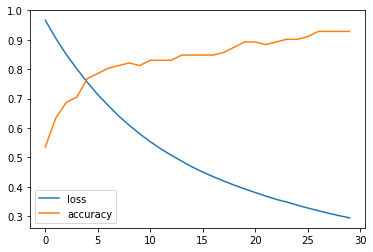

In [12]:
# モデルの構築
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential() # 初期化
model.add(Dense(32, input_dim=4)) # 32個のニューロンを持つ全結合層(入力層)
model.add(Activation('relu')) # 活性化関数にランプ関数を指定
model.add(Dense(32)) # 32個のニューロンを持つ全結合層(隠れ層)
model.add(Activation("relu")) 
model.add(Dense(3)) # 3個のニューロンを持つ全結合層(出力層)
model.add(Activation("softmax")) # 活性化関数にソフトマックス関数を指定
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"]) # モデルをコンパイル。

print(model.summary()) # モデルの内容を表示

# 学習
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

# 結果(学習推移)表示
import matplotlib.pyplot as plt

hist_loss = history.history["loss"] # 訓練データの誤差
hist_acc = history.history["accuracy"] # 訓練データの精度(正解率)
plt.plot(np.arange(len(hist_loss)), hist_loss, label="loss")
plt.plot(np.arange(len(hist_acc)), hist_acc, label="accuracy")
plt.legend()
plt.show()

In [13]:
# モデル評価
loss, accuracy = model.evaluate(x_test, t_test)
print("誤差: " , loss, "精度: ", accuracy)

2/2 [==============================] - 0s 6ms/step - loss: 0.2568 - accuracy: 0.9737
誤差:  0.25675907731056213 精度:  0.9736841917037964


In [15]:
# モデルの使用
y_test = model.predict(x_test)
print(y_test[:10]) # 予測結果の確率(各行がそれぞれ3つの分類に対する確率で総和が1になっている)

# モデルの保存・読込
from keras.models import load_model

model.save("iris_model.h5")
model = load_model("iris_model.h5")

[[0.1369523  0.4500707  0.41297692]
 [0.02696186 0.12501167 0.84802645]
 [0.06510405 0.29542926 0.63946664]
 [0.01940054 0.0660339  0.9145655 ]
 [0.05322745 0.30315888 0.64361364]
 [0.9667935  0.02614562 0.00706083]
 [0.9757268  0.01911635 0.00515682]
 [0.9722096  0.02254736 0.00524309]
 [0.06071328 0.8954091  0.04387762]
 [0.98831743 0.0096881  0.00199448]]
